# OLYMPIC DATA ANALYSIS


* Veri seti Atina 1896'dan Rio 2016'ya kadar olan 120 yıllık tüm olimpiyat müsabakalarını ve katılımcılarının özelliklerini içermektedir.

* Kış ve Yaz Oyunları 1992'ye kadar aynı yılda yapılmıştır. Sonraki yıllar Kış oyunları 1994'ten başlayarak, Yaz oyunları da 1996'da itibaren dört yıllık bir döngüde yapılmaya devam edilmiştir.

* Kaç sporcu, spor ve ulus var? Çoğu sporcu nereden geliyor? Kim altın madalya kazanıyor? Sporcuların özellikleri nelerdir (örn. cinsiyet, yaş ve fiziksel beden)?


## Veri Seti:

* athlete_events.csv dosyasında;
    * 271116 satır -> Her satır bir yarışmacıyı ifade etmektedir.
    * 15 sütun bulunur.
        * ID - Unique number for each athlete
        * Name - Athlete's name
        * Sex - M or F
        * Age - Integer
        * Height - In centimeters
        * Weight - In kilograms
        * Team - Team name
        * NOC - National Olympic Committee
        * Games - Year and season
        * Year - Integer
        * Season - Summer or Winter
        * City - Host city
        * Sport - Sport
        * Event - Event
        * Medal - Gold, Silver, Bronze, or NA

## İçerik:

* Veri Setine İlk Bakış

* Analizler
    * 1. Katılım Sağlayan Ülkeler
        * 1.1 - En Çok Katılım Sağlayan 10 Ülke
    * 2. Oyun Sezonları
        * 2.1 - Yaz ve Kış Sezonlarının Karşılaştırılması
        * 2.2 - Yaz ve Kış Sezonlarında Oynanan Sporlar
        * 2.3 - Kış Sporlarında En İyi Olan Ülkeler
        * 2.4 - Yaz Sporlarında En İyi Olan Ülkeler
    * 3. Sporcuların Cinsiyetlere Göre Dağılımı
        * 3.1 - Olimpiyatlardaki Kadın Sporcular
    * 4. Sporcuların Yaş Dağılımı
        * 4.1 - Sporcuların Yaş Dağılımı
    * 5. Madalya Kazanan Ülkeler
        * 5.1 - Madalya Kazananların Boy ve Kilosu
        * 5.2 - Altın Madalya
    * 6. Yarışmalara En Çok Katılımın Sağlandığı Yıl
    * 7. Canım Memleketim Türkiye

## **Veri Setine İlk Bakış**

In [455]:
#kullanılacak kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [456]:
#veri setlerinin okutulması
athletes = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

In [457]:
athletes.head() #ilk 5 satırı ve içerdiği bilgileri görelim

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [458]:
regions.head() 

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [459]:
athletes.tail() #son 5 satırı ve içerdiği bilgileri görelim

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


Veri setimize göre olimpiyatlara katılan toplam kişi sayısı 271116'dır. 

In [460]:
regions.tail() 

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


Olimpiyatlara toplam 230 ülke katılım göstermiştir.

In [461]:
athletes.shape 

(271116, 15)

Veri setimiz 271116 sütun ve 15 sütundan oluşmaktadır.

In [462]:
athletes.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [463]:
# kategorik kolonlar (object)

cat_cols = athletes.select_dtypes(include='object').columns

cat_cols

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [464]:
numeric_cols = athletes.select_dtypes(include=['int64', 'float64']).columns

list(numeric_cols)

['ID', 'Age', 'Height', 'Weight', 'Year']

* 15 Sütun bulunur.

    * ID - Unique number for each athlete -> Nümerik
    * Name - Athlete's name -> Kategorik
    * Sex - M or F -> Kategorik
    * Age - Integer -> Nümerik
    * Height - In centimeters -> Nümerik
    * Weight - In kilograms -> Nümerik
    * Team - Team name -> Kategorik
    * NOC - National Olympic Committee -> Kategorik
    * Games - Year and season -> Kategorik
    * Year - Integer -> Nümerik
    * Season - Summer or Winter -> Kategorik
    * City - Host city -> Kategorik
    * Sport - Sport -> Kategorik
    * Event - Event -> Kategorik
    * Medal - Gold, Silver, Bronze, or NA -> Kategorik


1) int data type variables: 'Year', 'ID'

2) float data type variables: 'Age', 'Height', 'Weight'

3) object (numbers + strings) data type variables: 'Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport','Event', 'Medal'

In [465]:
athletes.info() #veri setimiz hakkında özet  bilgiye ulaşabiliriz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Veri setimizde 2 adet integer, 3 adet float ve 10 adet object özelliğe sahip veri vardır.

In [466]:
athletes.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [467]:
nan_values = athletes.isnull()
nan_columns = nan_values.any()
nan_columns 

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

NaN değerlerin bulunduğu sütunlar Age, Height, Weight ve Medal sütunlarıdır.

In [468]:
athletes.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Boş verilerin sayısını görerek Yaş, Boy, Kilo ve Madalya sütunlarındaki eksik veriler hakkında fikir sahibi olalım. Eksik verileri "dropna" metodunu kullanarak silebilir veya "fillna" ile doldurabiliriz. Grafiklerimin veri kaybı sebebiyle yanlış yorumlanmasını istemediğim için NaN değerlere şimdilik işlem yapmıyorum.

In [469]:
athletes_df = athletes.merge(regions, how = 'left', on = 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


İki veri setimi birleştirerek sporcular hakkında bütün bilgileri bir araya toplamış oldum.

## **Analizler**

### 1. Katılım Sağlayan Ülkeler

* 1.1 - En Çok Katılım Sağlayan 10 Ülke

In [470]:
# en iyi 10 ülke
top_countries = athletes.Team.value_counts().sort_values(ascending=False).head(10)
top_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot: title={'center': 'Ülkelere Göre Genel Katılım'}, ylabel='Team'>

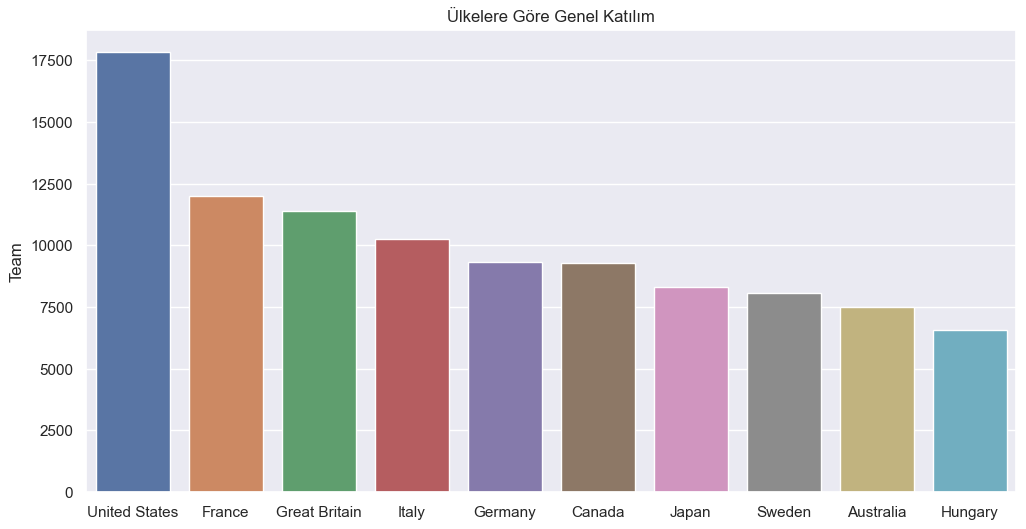

In [471]:
plt.figure(figsize=(12,6))
plt.title("Ülkelere Göre Genel Katılım")
sns.barplot(x=top_countries.index, y=top_countries)

En çok katılım sağlayan ilk 10 ülkenin katılımcı sayılarıyla birlikte görselleştirilmesini gerçekleştirdim.

### 2. Oyun Sezonları

* 2.1 - Yaz ve Kış Sezonlarının Karşılaştırılması

In [472]:
game_seasons = athletes.Season.value_counts()
game_seasons

Summer    222552
Winter     48564
Name: Season, dtype: int64

Yaz ve Kış sezonlarına katılım hakkında bilgi edinmek için value_counts() verinin keşfi sırasında kullanılan kullanışlı bir metottur. 

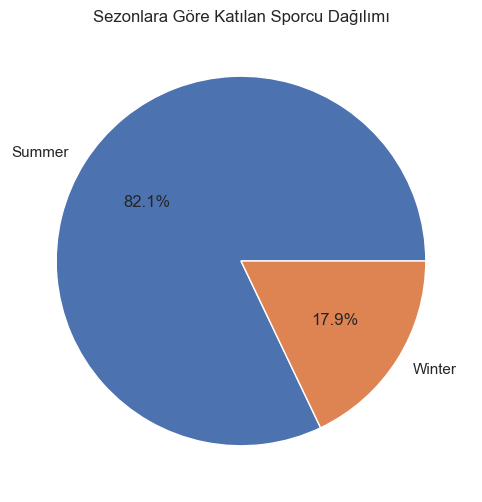

In [473]:
plt.figure(figsize=(12,6))
plt.title("Sezonlara Göre Katılan Sporcu Dağılımı")
plt.pie(game_seasons, labels=game_seasons.index, autopct ='%1.1f%%');

Pie Chart ile görselleştirdiğimizde de gördüğümüz gibi yaz sezonuna %80'den fazla katılım olmuş, düzenlenen etkinlik ve oynanan oyun sayısının daha fazla olduğunu tahmin ediyorum.

Düzenlenen etkinlik ve spor sayılarına bakalım.

In [474]:
winter_olympic = athletes[athletes.Season=='Winter']
winter_sports = len(winter_olympic[['Sport']].drop_duplicates())
winter_events = len(winter_olympic[['Event']].drop_duplicates())
print(f'Oynanan Sporlar: {winter_sports}, Düzenlenen Etkinlikler: {winter_events}')

Oynanan Sporlar: 17, Düzenlenen Etkinlikler: 119


Kış sezonunda toplam 17 farklı spor ve 119 adet etkinlik düzenlenmiş.

In [475]:
summer_olympic = athletes[athletes.Season=='Summer']
summer_sports = len(summer_olympic[['Sport']].drop_duplicates())
summer_events = len(summer_olympic[['Event']].drop_duplicates())
print(f'Oynanan Oyunlar: {summer_sports}, Düzenlenen Etkinlikler: {summer_events}')

Oynanan Oyunlar: 52, Düzenlenen Etkinlikler: 651


Yaz sezonunda ise 52 farklı spor ve 651 adet düzenlenen etkinlik bulunmaktadır.

Tahmin ettiğim gibi yaz sezonunda oynanan oyun sayısı daha fazla, bu sayede katılım da daha yüksektir.

* 2.2 - Yaz ve Kış Sezonlarında Oynanan Sporlar

Yaz sezonunda oynanan sporları isim isim görelim.

In [476]:
summer_sports = athletes[athletes.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

Kış sezonunda oynanan sporları isim isim görelim.

In [477]:
winter_sports = athletes[athletes.Season == 'Winter'].Sport.unique()
winter_sports 

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

* 2.3 - Kış Sporlarında En İyi Olan Ülkeler

Text(0.5, 1.0, 'Kış Sporlarında En İyi Ülkeler')

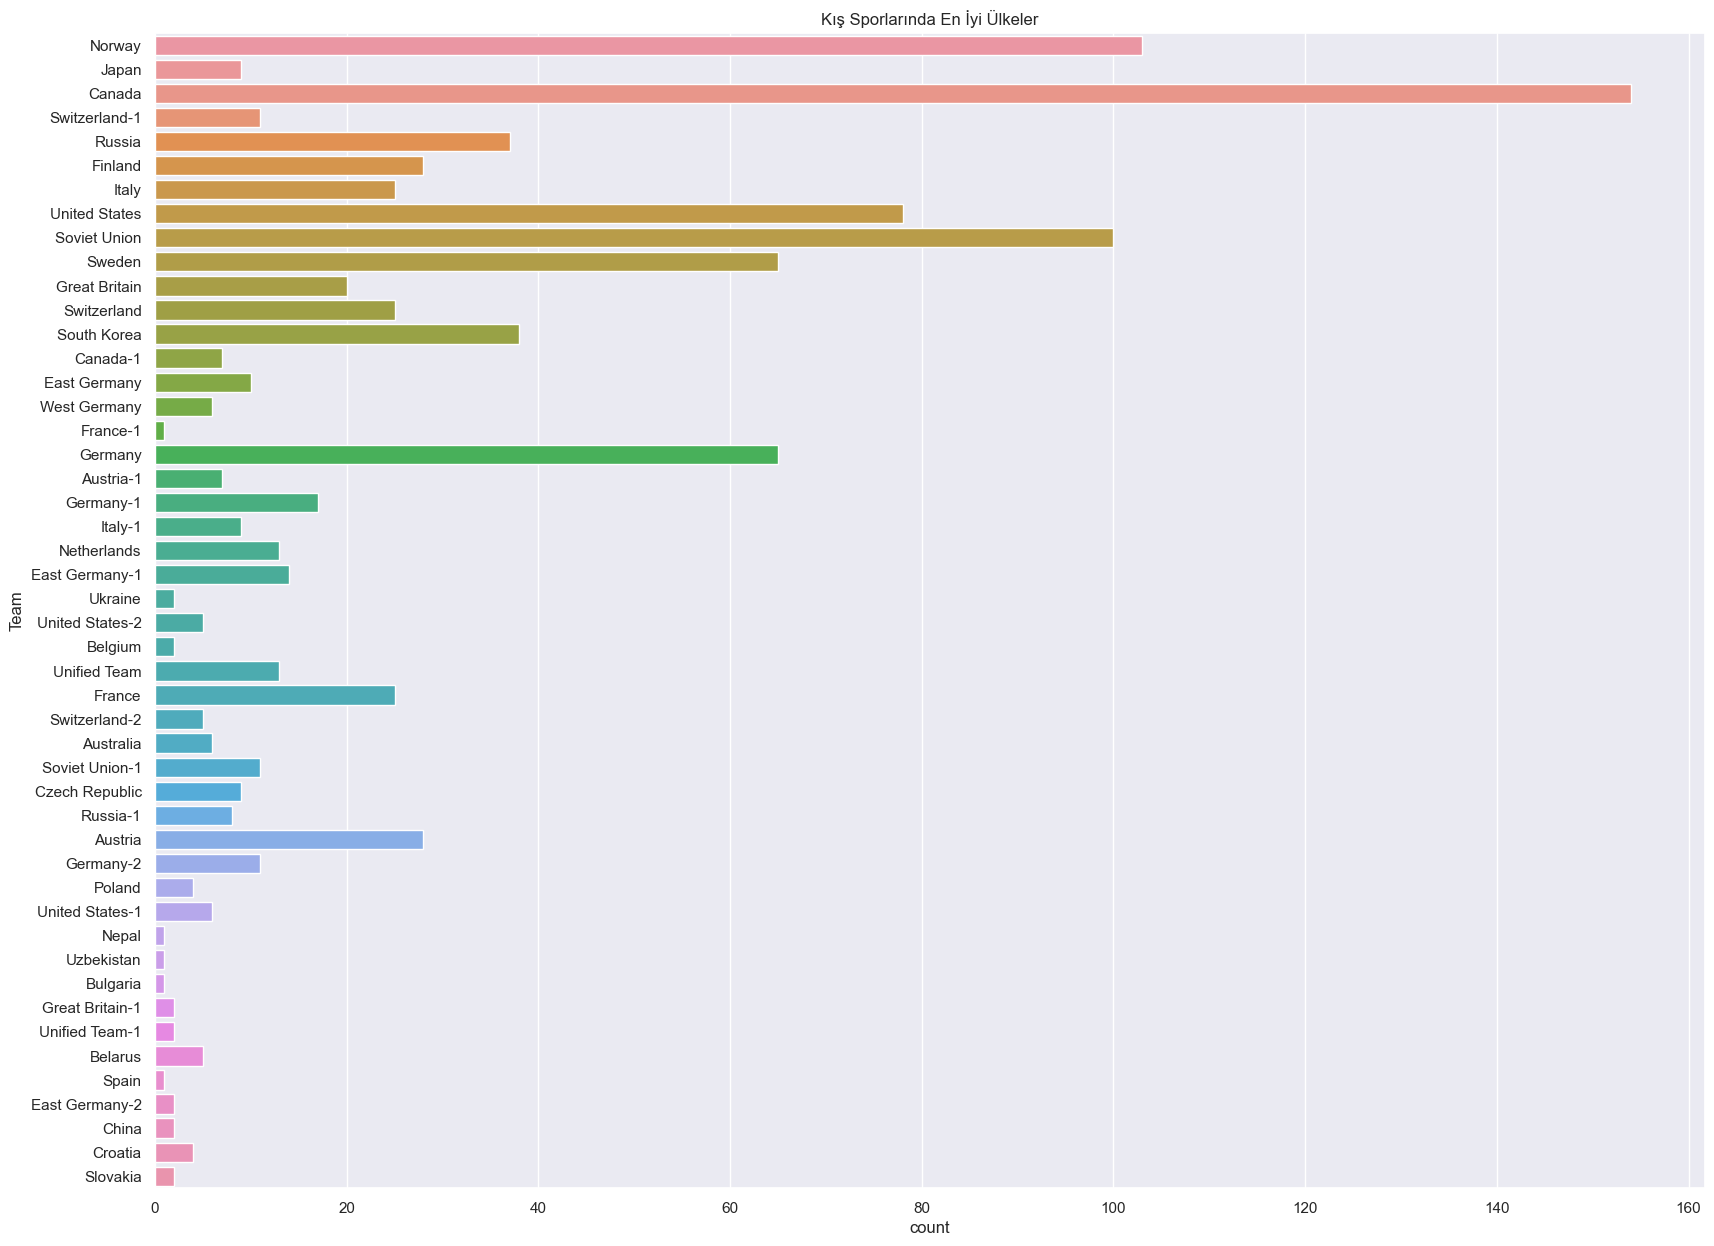

In [516]:
#kış sporlarında en iyi olan ülkeler
best_winter_olympic = athletes_df[(athletes_df['Season']=='Winter') & (athletes_df['Medal']=="Gold")].sort_values(["Season","Medal"], ascending=True).head(1000)
plt.figure(figsize=(20,15))
sns.countplot(y='Team', data=best_winter_olympic)
plt.xticks()
plt.title('Kış Sporlarında En İyi Ülkeler')

Başlıca Norveç, Kanada ve Sovyetler Birliği'nin soğuk memleketler olması sebebiyle kış sporlarında başarı göstermeleri yadsınamaz.

* 2.4 - Yaz Sporlarında En İyi Olan Ülkeler

Text(0.5, 1.0, 'Yaz Sporlarında En İyi Ülkeler')

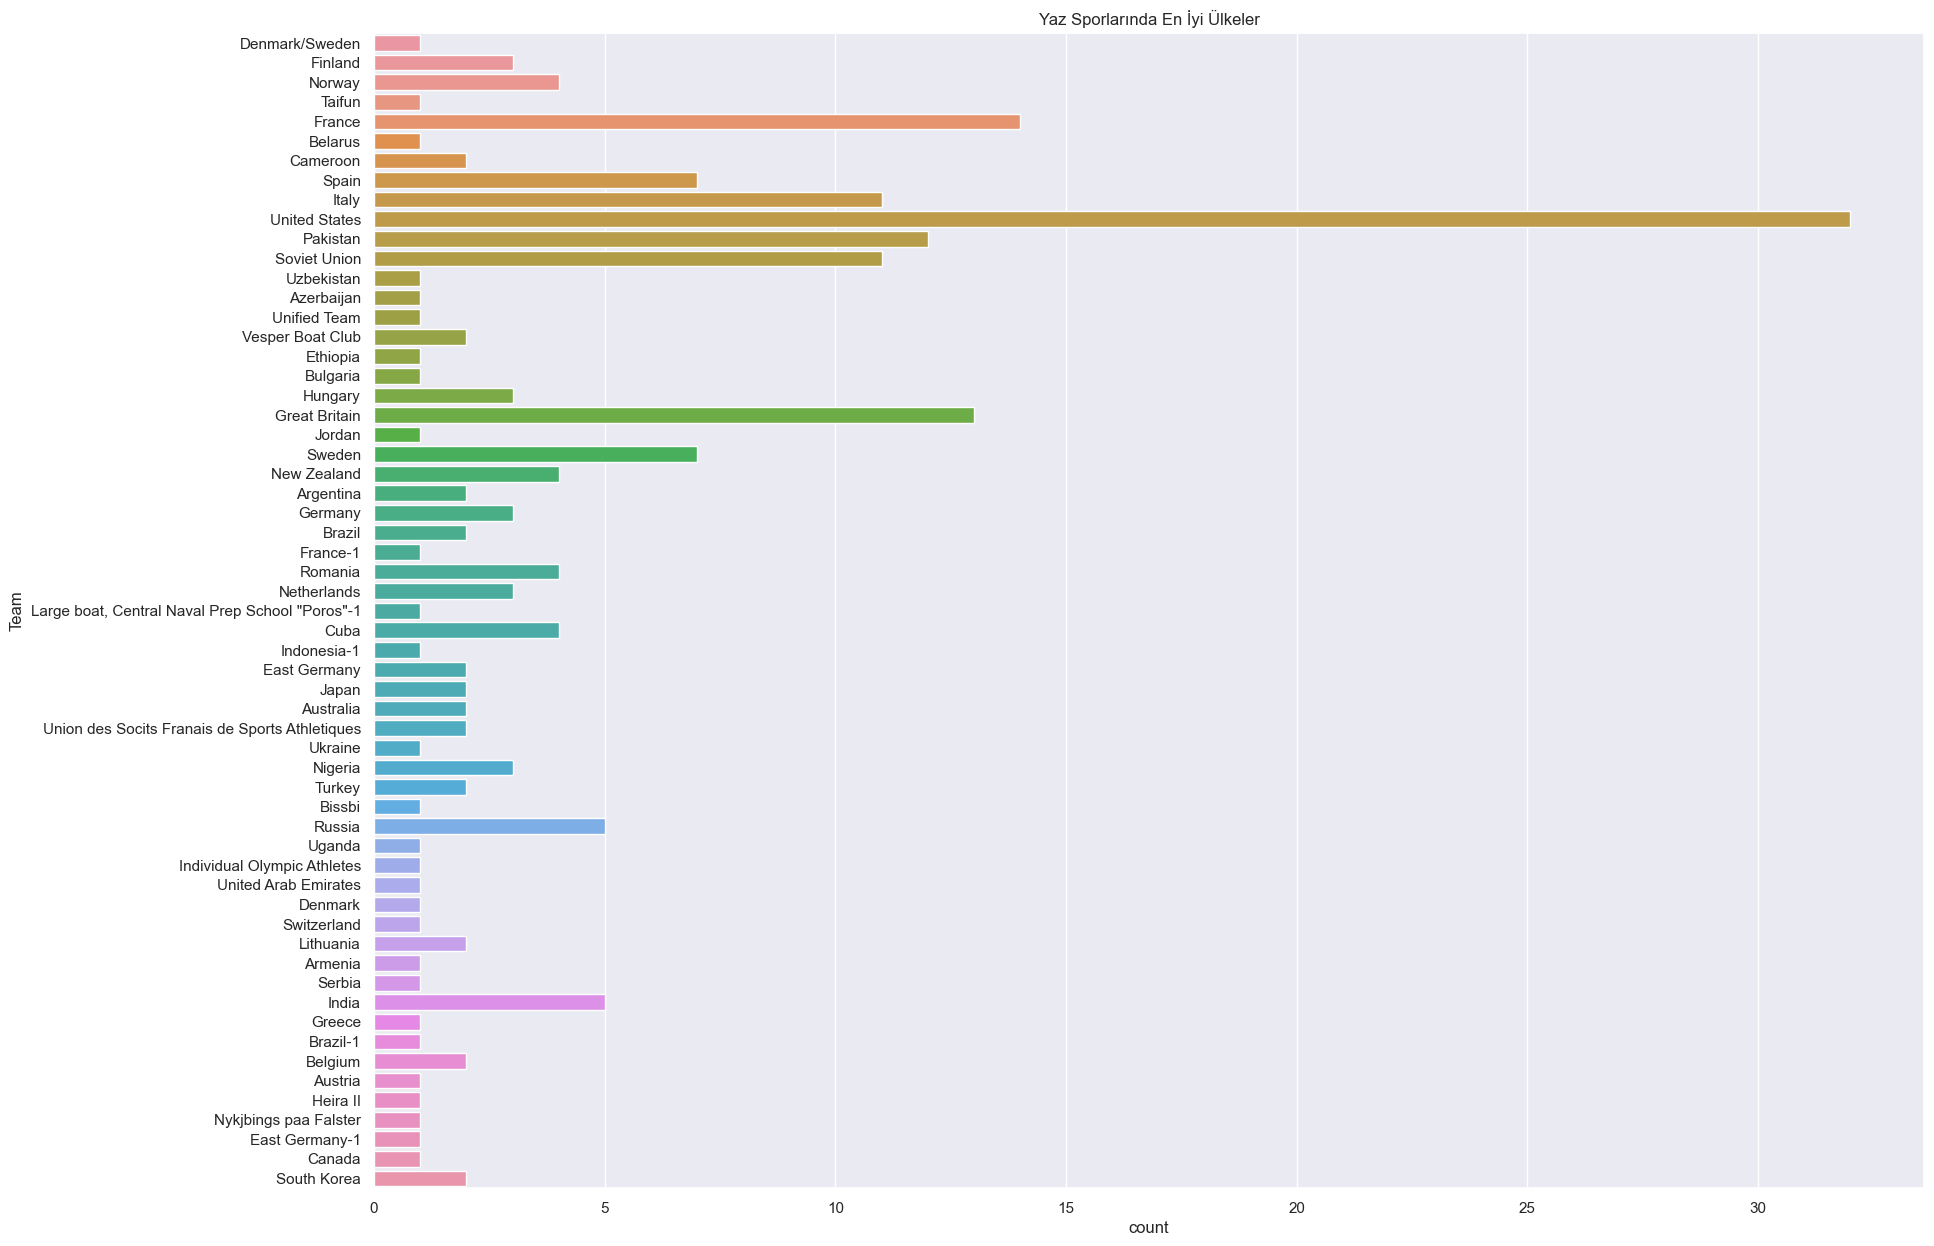

In [479]:
best_summer_olympic = athletes_df[(athletes_df['Season']=='Summer') & (athletes_df['Medal']=="Gold")].sort_values(["Season","Medal"], ascending=False).head(200)
plt.figure(figsize=(20,15))
sns.countplot(y='Team', data=best_summer_olympic)
plt.title('Yaz Sporlarında En İyi Ülkeler')

En çok katılım sağlayan ülkenin kış ve özellikle yaz oyunlarında büyük başarı elde etmesi şaşırtıcı değil. Amerikanın hemen ardından en çok katılım sağlayan Fransa da yaz oyunlarında en çok başarılı olan ülkelerdendir. Hemen ardından Birleşik Krallık, Pakistan, İtalya ve Sovyetler Birliği başarılı olan ülkelerdendir. Pakistan ilginç bir istatistik.  

In [480]:
athletes.query('Team == "Pakistan"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
233,111,Aqarab Abbas,M,22.0,190.0,88.0,Pakistan,PAK,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's Hammer Throw,NaN
237,115,Ghulam Abbas,M,24.0,181.0,74.0,Pakistan,PAK,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 400 metres Hurdles,NaN
245,121,Muhammad Abbas,M,23.0,168.0,55.0,Pakistan,PAK,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
247,123,Sohail Abbas,M,25.0,178.0,80.0,Pakistan,PAK,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN
248,123,Sohail Abbas,M,29.0,178.0,80.0,Pakistan,PAK,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN


In [481]:
pakistan = athletes_df[(athletes_df['region']=='Pakistan') & (athletes_df['Medal']=="Gold")]
pakistan['Sport']

524       Hockey
2478      Hockey
2480      Hockey
2489      Hockey
2502      Hockey
2503      Hockey
2506      Hockey
2984      Hockey
2988      Hockey
3437      Hockey
3871      Hockey
4725      Hockey
8407      Hockey
10268     Hockey
10616     Hockey
11621     Hockey
31960     Hockey
32930     Hockey
49191     Hockey
49192     Hockey
89291     Hockey
89294     Hockey
101302    Hockey
101320    Hockey
112247    Hockey
116838    Hockey
116850    Hockey
116863    Hockey
116891    Hockey
117716    Hockey
146571    Hockey
146574    Hockey
147618    Hockey
161380    Hockey
164355    Hockey
170678    Hockey
197129    Hockey
197295    Hockey
210610    Hockey
218263    Hockey
245773    Hockey
269611    Hockey
Name: Sport, dtype: object

İlginç bir şekilde Pakistan'a Yaz sezonlarında altın madalya kazandıran spor sadece hokeymiş.

### 3. Sporcuların Cinsiyetlere Göre Dağılımı

In [482]:
gender_counts = athletes.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

Erkek sporcuların daha fazla katılım sağladığını görebiliriz.

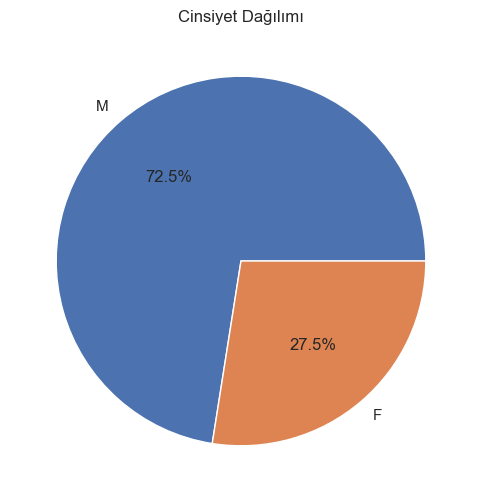

In [483]:
plt.figure(figsize=(12,6))
plt.title("Cinsiyet Dağılımı")
plt.pie(gender_counts, labels=gender_counts.index, autopct ='%1.1f%%');

Pie Chart ile görselleştirdiğimizde de erkek katılımcı sayısının oransal olarak fazla olduğunu görebiliriz. Tabi incelediğimiz veri setinin 120 yıllık olmasının da etkileri büyüktür.

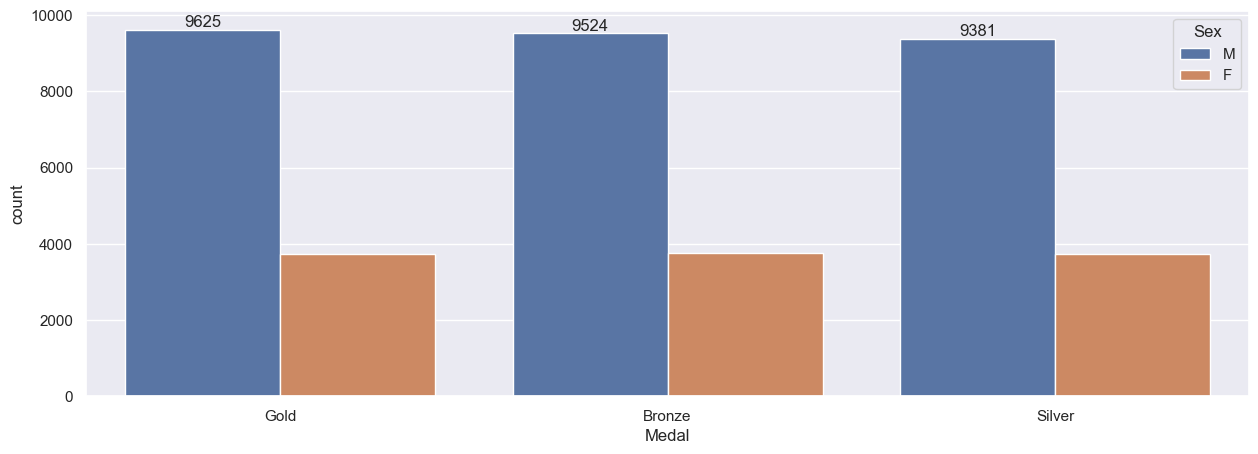

In [484]:
fig, scatter_by_sex =plt.subplots(1, figsize=(15,5))
sns.countplot(x=athletes.Medal, hue=athletes.Sex)
scatter_by_sex.bar_label(scatter_by_sex.containers[0])
plt.show()

Verilen madalyalar katılımcı sayısıyla doğru orantılıdır. Madalyalar çeşitlerine göre eşit sayılarda dağıtılmış diyebiliriz.

* 3.1 - Olimpiyatlardaki Kadın Sporcular

In [485]:
female_participants = athletes[(athletes.Sex == 'F')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


Olimpiyatlar boyunca kadın sporcuların seneler içindeki katılımının ne kadar arttığını ilk beş veri ve son beş veriyi karşılaştırarak görebiliriz.

In [486]:
female_participants.tail()

,Year,Sex
29,2008,5816
30,2010,1847
31,2012,5815
32,2014,2023
33,2016,6223


Veri setimizin son senesi olan 2016'da kadın sporcuların katılım sayısı 6223'e çıkmış. 33'lerden buralara gelmek gurur verici.

Text(0.5, 1.0, 'Yaz Sezonunda Kadın Sporcular')

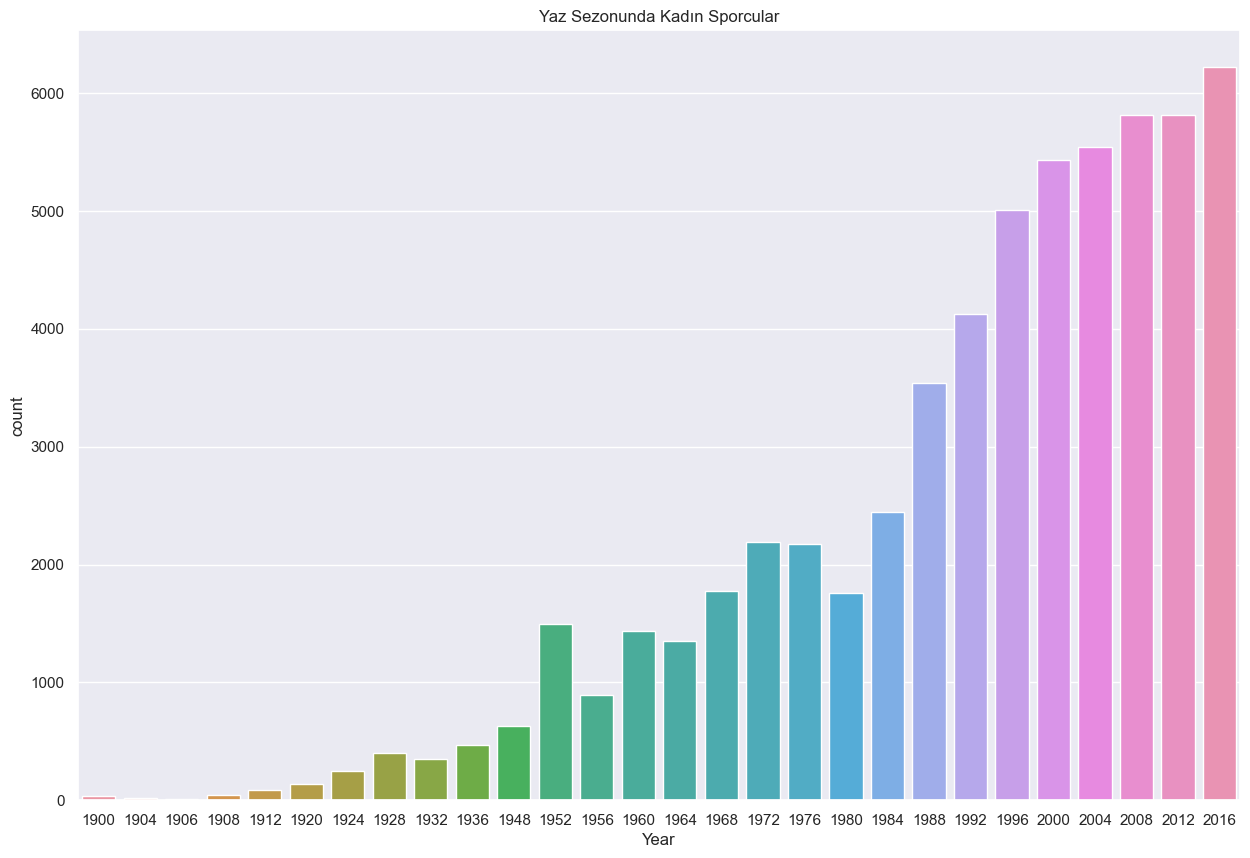

In [487]:
womenOlympicsSum = athletes[(athletes.Sex == 'F') & (athletes.Season == 'Summer')]
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))
sns.countplot(x='Year', data=womenOlympicsSum)
plt.title('Yaz Sezonunda Kadın Sporcular')

Sadece yaz sezonlarındaki kadın sporcuların seneler içinde katılım sayısındaki artışı görebiliriz.

Text(0.5, 1.0, 'Kış Sezonunda Kadın Sporcular')

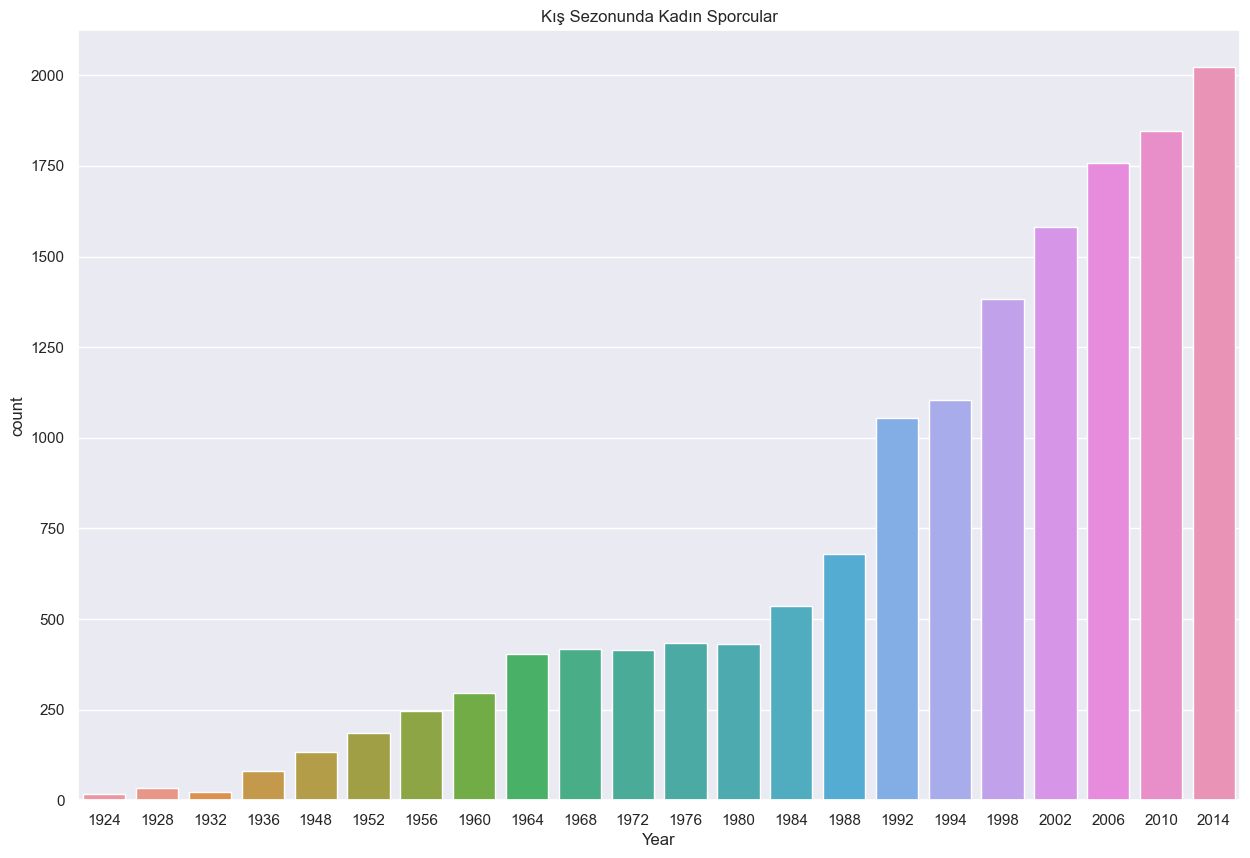

In [488]:
womenOlympicsWin = athletes[(athletes.Sex == 'F') & (athletes.Season == 'Winter')]
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))
sns.countplot(x='Year', data=womenOlympicsWin)
plt.title('Kış Sezonunda Kadın Sporcular')

Kış sezonlarında katılım sağlayan kadın sporcuların da sayısı artmış. Her iki tabloyu kıyasladığımız zaman 1992'den sonra kadınların katılım sayısında gözle görünür bir artış olduğunu fark edebiliriz. 1992'de Kış ve Yaz oyun periyotlarının değişmesiyle birlikte katılımla ilgili bir kontenjan kararı da alınmış olabilir.

Text(0.5, 1.0, 'Zaman İçinde Kadın Sporcular')

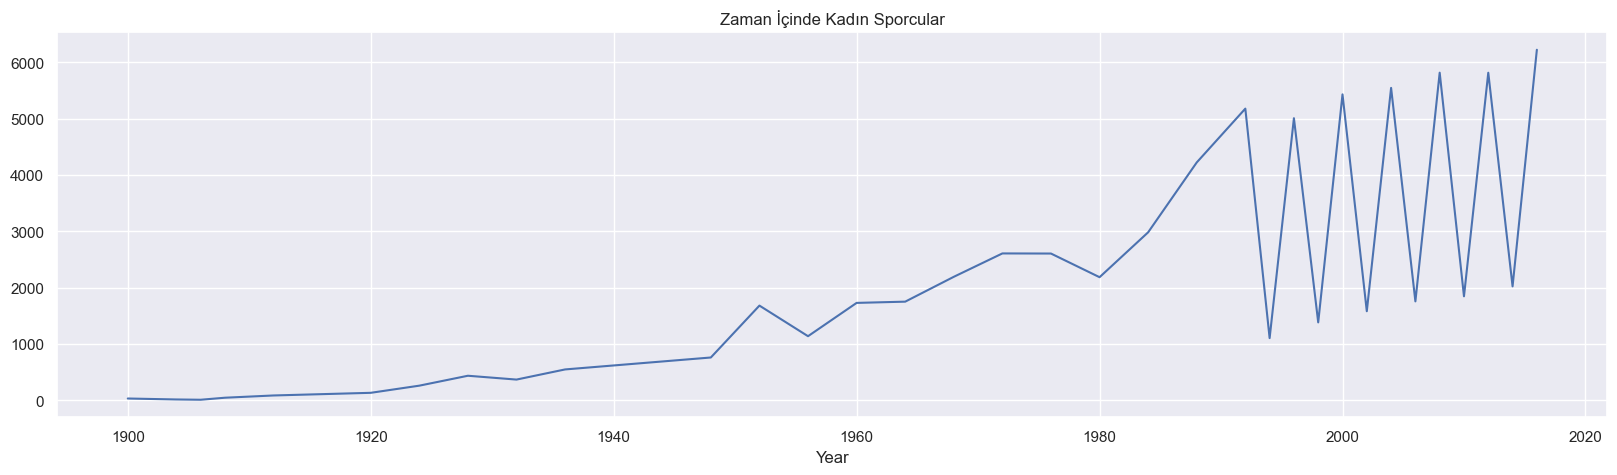

In [489]:
womenOlympics = athletes[(athletes.Sex == 'F')]
part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize = (20,5))
part.loc[: , 'F'].plot()
plt.title('Zaman İçinde Kadın Sporcular')

Zaman içinde kadın sporcuların katılımındaki artış bu şekildedir. Kış sezonlarında eğrinin aşağı çekilmesi katılımın ve müsabakaların kış sezonunda daha az olmasından kaynaklanmaktadır.

### 4. Sporcuların Yaş Dağılımı

* 4.1 - Sporcuların Yaş Dağılımı

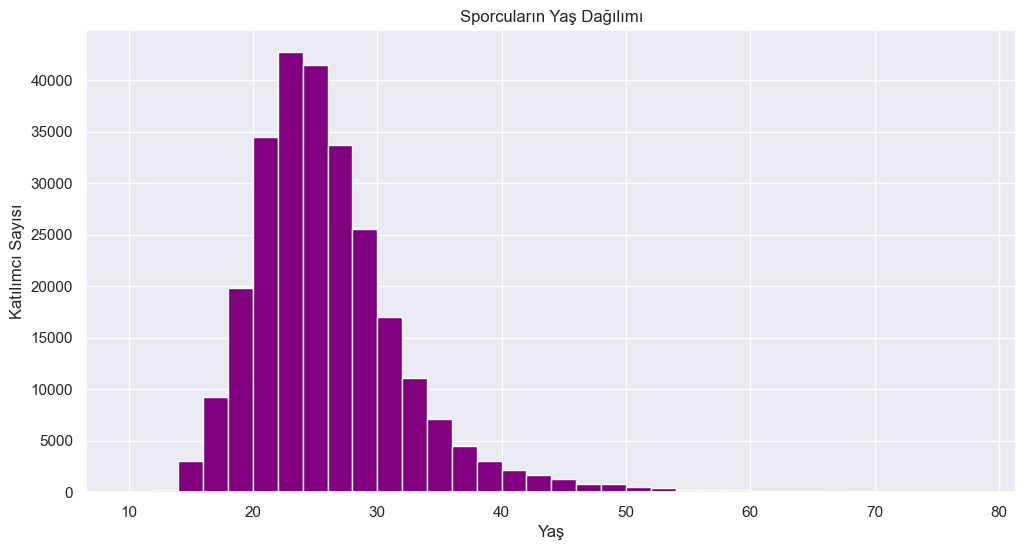

In [490]:
plt.figure(figsize=(12,6))
plt.title("Sporcuların Yaş Dağılımı")
plt.xlabel('Yaş')
plt.ylabel('Katılımcı Sayısı')
plt.hist(athletes.Age, bins = np.arange(10, 80, 2), color = 'purple', edgecolor = 'white');

Genel olarak katılım sağlayan genç bir sporcu kitlesi hakim olsa da 20'den küçük ve 50'den büyükleri görmek ilgi çekici. 20-30 yaş aralığında 40 000'den fazla katılım sağlanmış.

### 5. Madalya Kazanan Ülkeler

Katılımın en çok olduğu ülkeleri hatırlıyoruz, bakalım ne kadar madalya kazanmışlar.

In [491]:
# madalya alan ülkeler 
athletes_df['region'].value_counts().reset_index(name='Medal').head()

,index,Medal
0,USA,18853
1,Germany,15883
2,France,12758
3,UK,12256
4,Russia,11692


Amerika en çok katılım sağlayan ülkemizdi. Madalyalarda da 18853 madalyayla en başarılı ülke olarak tarihe adını yazdırmış.

* 5.1 - Madalya Kazananların Boy ve Kilosu

In [492]:
not_null_medals = athletes[(athletes['Height'].notnull()) & (athletes['Weight'].notnull())]

Text(0.5, 1.0, 'Madalya Kazananların Boy ve Kilosu')

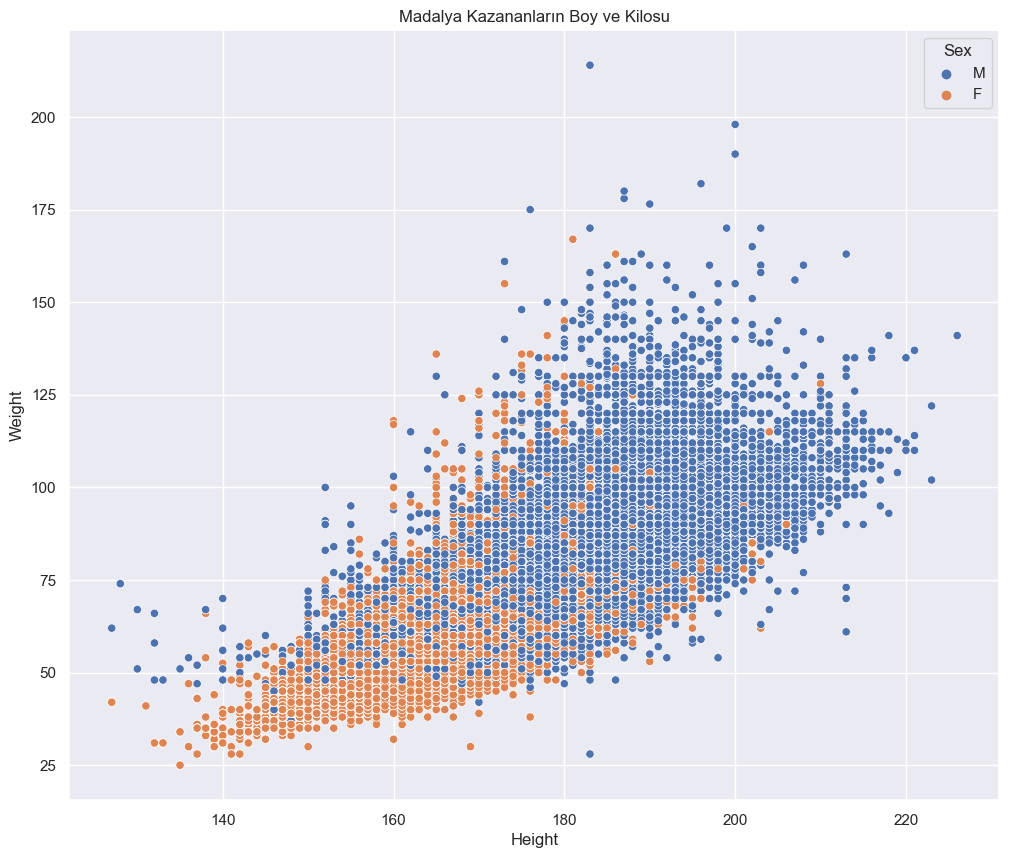

In [493]:
plt.figure(figsize = (12,10))
axis = sns.scatterplot(x="Height", y="Weight", data=not_null_medals, hue="Sex")
plt.title('Madalya Kazananların Boy ve Kilosu')

Madalya kazananların boy ve kilosunu aynı anda görebiliriz.

* 5.2 - Altın Madalya

In [494]:
#Altın Madalya
gold_medals = athletes[(athletes.Medal == 'Gold')]
gold_medals.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
113,40,Roald Edgar Aas,M,31.0,NaN,NaN,Norway,NOR,1960 Winter,1960,Winter,Squaw Valley,Speed Skating,"Speed Skating Men's 1,500 metres",Gold


Altın madalya kazanan sporcuların bilgilerine ulaşabiliriz.

In [495]:
#yalnızca NaN'den farklı değerleri alalım
gold_medals = gold_medals[np.isfinite(gold_medals['Age'])]

Altın madalya kazanan sporcuları yaşlarına ve yaş yoğunluklarının ortalamasına göre görmek istersek bu grafikten yararlanabiliriz.

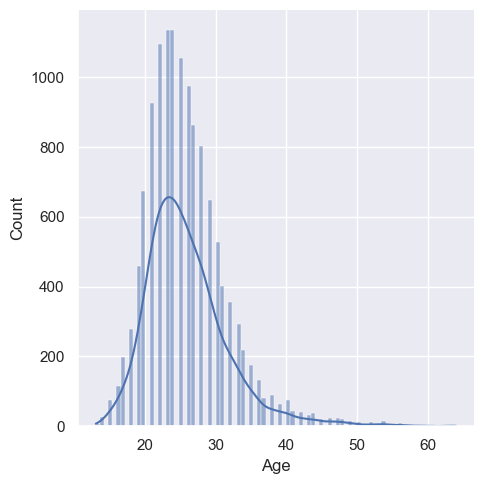

In [496]:
sns.displot(gold_medals['Age'], kde = True);

Katılım sağlayanların yaş aralığını daha önce incelediğimizde karşılaştığımız tabloya benzer bir şekilde genç sporcu kitlesinin yanı sıra 60 yaşından büyük ve 15'den de küçük altın madalya kazanan sporcuları görebiliriz. Hangi dallarda yarıştıklarına bakalım.

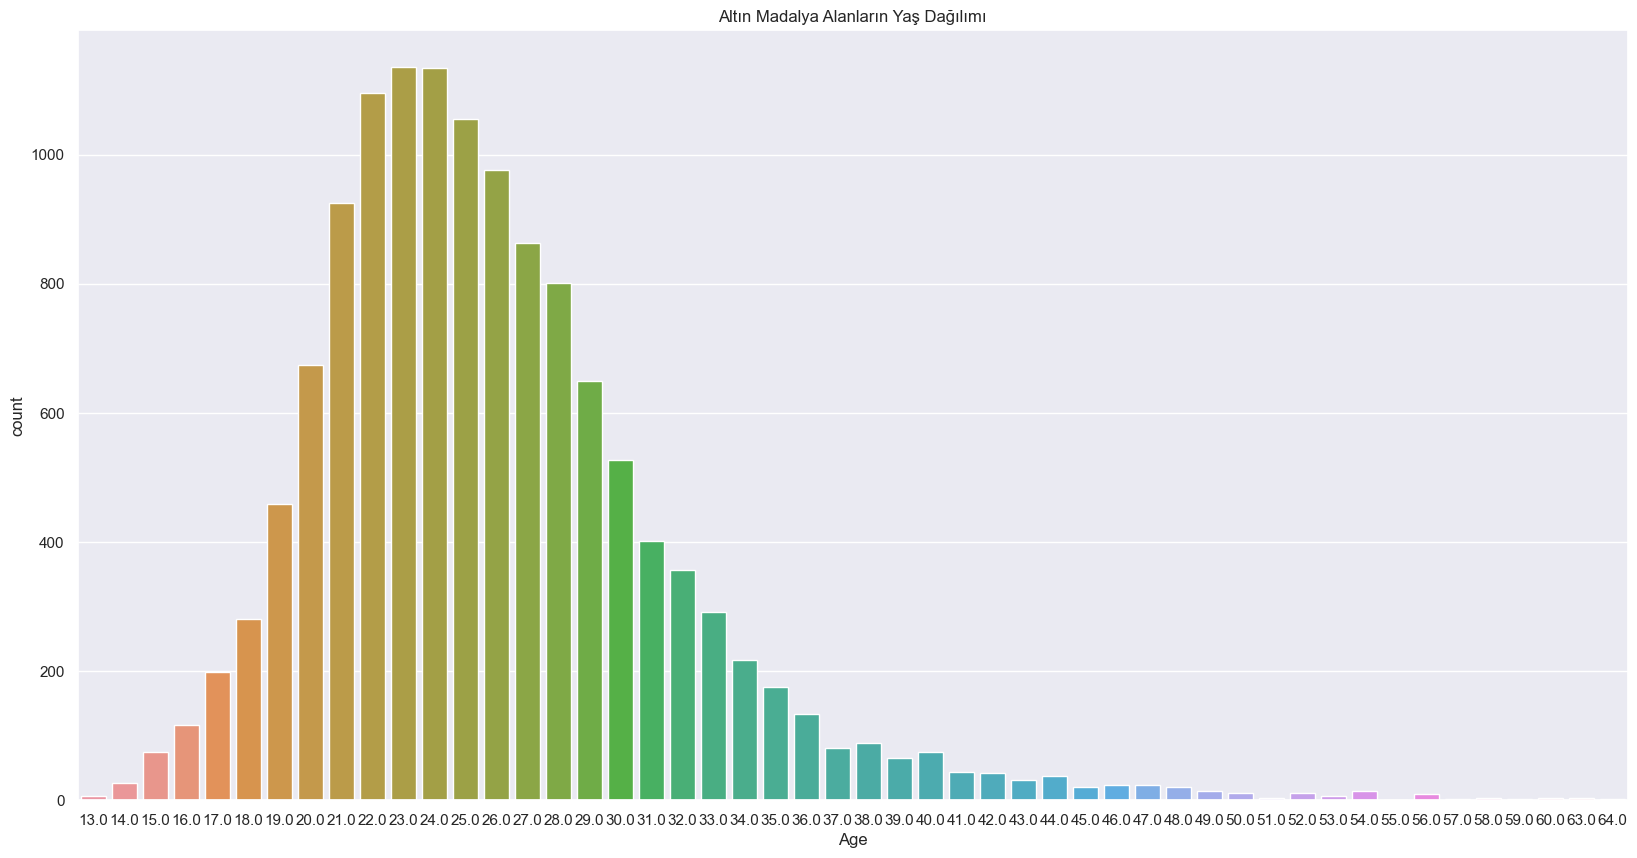

In [497]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(data=gold_medals, x='Age')
plt.title("Altın Madalya Alanların Yaş Dağılımı")
plt.show()

In [498]:
gold_medals['ID'][gold_medals['Age'] < 15].count()

34

15 yaşından küçük 34 kişi altın madalya kazanmış.

In [499]:
sport_event = gold_medals['Sport'][gold_medals['Age']<15]
sport_event

16849                      Swimming
27207                        Rowing
37861                        Rowing
37862                        Rowing
37863                        Rowing
43773                    Gymnastics
43777                    Gymnastics
43778                    Gymnastics
52010                      Swimming
61645                      Swimming
69216                    Gymnastics
73581                        Diving
78544                        Diving
96101                       Sailing
104649                     Swimming
119277    Short Track Speed Skating
120329                     Swimming
147676                       Rowing
150298                     Swimming
160920                   Gymnastics
163440                     Swimming
172293                     Swimming
183310                   Gymnastics
183314                   Gymnastics
184407                     Swimming
184410                     Swimming
200704                       Diving
240012                      

15 yaşından küçük sporcuların daha çok jimnastik, yüzme, dalış, kürek çekme, yelkencilik ve paten gibi sporlarda başarılı olduğunu görebiliriz.

Text(0.5, 1.0, '15 Yaşından Küçük Altın Madalya Alan Sporcular')

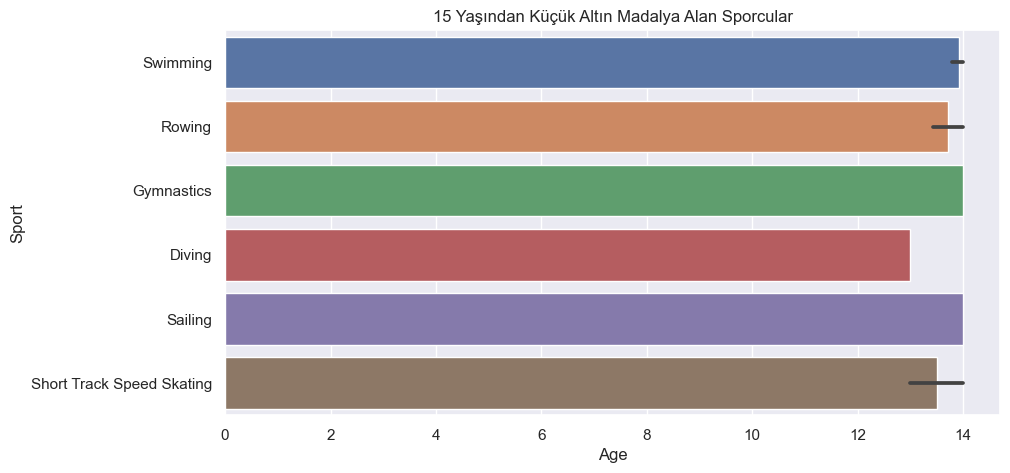

In [500]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.barplot(x='Age', y='Sport', data=gold_medals[(gold_medals.Age<15)])
plt.title('15 Yaşından Küçük Altın Madalya Alan Sporcular')

In [501]:
gold_medals['ID'][gold_medals['Age'] > 60].count()

6

60 yaşından büyük 6 kişi altın madalya kazanmış.

In [502]:
sport_event = gold_medals['Sport'][gold_medals['Age']>60]
sport_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

60 yaşından büyük sporcuların daha çok okçuluk alanında başarılı olması beklemediğim bir sonuçtu. Sanat yarışmaları, amerikan kroketi ve atıcılık alanlarında başarılı olduklarını da görebiliriz.

Text(0.5, 1.0, 'Altın Madalya Alan 60 Yaş Üstü Sporcular')

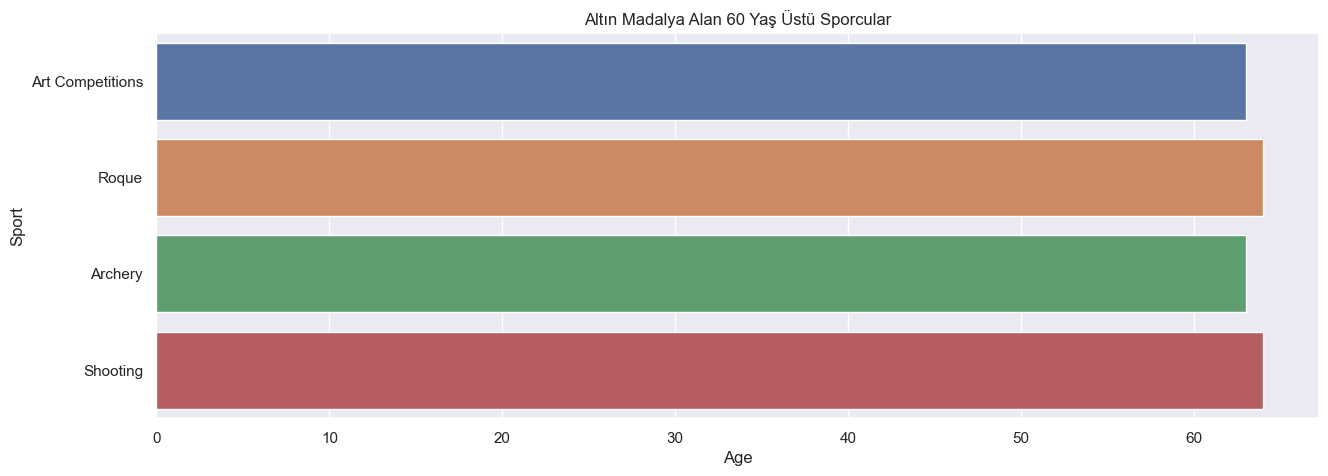

In [503]:
plt.figure(figsize=(15,5))
plt.tight_layout()
sns.barplot(x='Age', y='Sport', data=gold_medals[(gold_medals.Age>60)])
plt.title('Altın Madalya Alan 60 Yaş Üstü Sporcular')

### 6. Yarışmalara En Çok Katılımın Sağlandığı Yıl

In [504]:
max_year = athletes.Year.max()
print(max_year)

2016


Yarışmalara çizdiğimiz tablolardan da şahit olduğumuz üzere en çok katılımın sağlandığı yıl 2016'dır. Rio olimpiyatları olarak da anılan olimpiyatlarda en çok altın madalya kazanan 10 ülkeye bakalım.

In [505]:
team_names = athletes[(athletes.Year == max_year) & (athletes.Medal == 'Gold')].Team
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

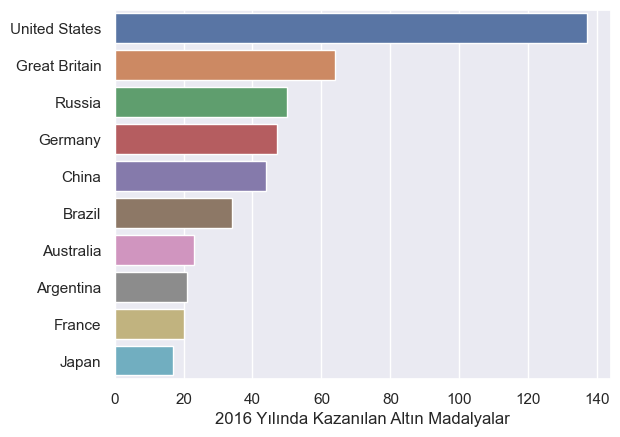

In [506]:
sns.barplot(x=team_names.value_counts().head(10), y=team_names.value_counts(10).head(10).index)

plt.ylabel(None);
plt.xlabel('2016 Yılında Kazanılan Altın Madalyalar');

Amerika yine en çok altın madalyayı kazanan ülke olmuş. Ev sahibi Brezilya da 6. sırada 34 altın madalya ile ilklerde yerini almış.

### 7. Canım Memleketim Türkiye

In [507]:
#Türkiye
athletes.query('Team == "Turkey"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
180,78,Salim Abanoz,M,26.0,NaN,NaN,Turkey,TUR,1996 Summer,1996,Summer,Atlanta,Judo,Judo Men's Lightweight,NaN
745,428,Elvan Abeylegesse,F,21.0,159.0,40.0,Turkey,TUR,2004 Summer,2004,Summer,Athina,Athletics,"Athletics Women's 1,500 metres",NaN
746,428,Elvan Abeylegesse,F,21.0,159.0,40.0,Turkey,TUR,2004 Summer,2004,Summer,Athina,Athletics,"Athletics Women's 5,000 metres",NaN
747,428,Elvan Abeylegesse,F,25.0,159.0,40.0,Turkey,TUR,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 5,000 metres",Silver
748,428,Elvan Abeylegesse,F,25.0,159.0,40.0,Turkey,TUR,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 10,000 metres",NaN


In [508]:
turkiye = athletes_df['Sport'][athletes_df['Team']=='Turkey']
turkiye

180            Judo
745       Athletics
746       Athletics
747       Athletics
748       Athletics
            ...    
268540    Wrestling
270050    Athletics
270051    Athletics
270725     Swimming
270726     Swimming
Name: Sport, Length: 1353, dtype: object

Türkiye'ye genel bir bakış yaptığımızda daha çok yaz sezonunda katılım sağladığımızı ve atletizm, güreş, yüzme başta olmak üzere sporlarla ilgilendiğimizi görebiliriz.

Text(0.5, 1.0, 'Altın Madalya Kazanan Türk Sporcuların Alanları ve Sayıları')

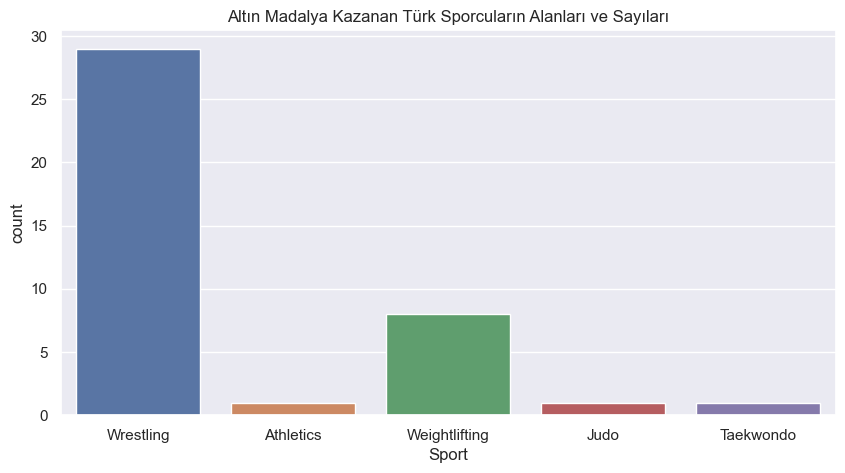

In [509]:
medal_temp = athletes_df[(athletes_df['region']=='Turkey') & (athletes_df['Medal']=="Gold")]
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(x='Sport', data=medal_temp)
plt.title('Altın Madalya Kazanan Türk Sporcuların Alanları ve Sayıları')

En çok altın madalya kazandığımız spor dalı ata sporumuz güreştir. Ağırlık kaldırma, atletizm, judo ve tekvando altın madalya kazandığımız diğer spor dallarıdır.

In [510]:
medal_temp.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
2846,1579,Nasuh Akar,M,23.0,NaN,NaN,Turkey,TUR,1948 Summer,1948,Summer,London,Wrestling,"Wrestling Men's Bantamweight, Freestyle",Gold,Turkey,NaN
2926,1634,Taha Akgl,M,25.0,192.0,125.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Gold,Turkey,NaN
10508,5741,Mahmut Atalay,M,34.0,171.0,78.0,Turkey,TUR,1968 Summer,1968,Summer,Mexico City,Wrestling,"Wrestling Men's Welterweight, Freestyle",Gold,Turkey,NaN
10618,5806,Celal Atik (Doan-),M,NaN,NaN,74.0,Turkey,TUR,1948 Summer,1948,Summer,London,Wrestling,"Wrestling Men's Lightweight, Freestyle",Gold,Turkey,NaN
10675,5834,smet Atl,M,NaN,173.0,NaN,Turkey,TUR,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Light-Heavyweight, Freestyle",Gold,Turkey,NaN


Farklı yıllarda güreş spor dalında kazandığımız altın madalyalara genel bir bakış yapabiliriz.

Text(0.5, 1.0, 'Gümüş Madalya Kazanan Türk Sporcuların Alanları ve Sayıları')

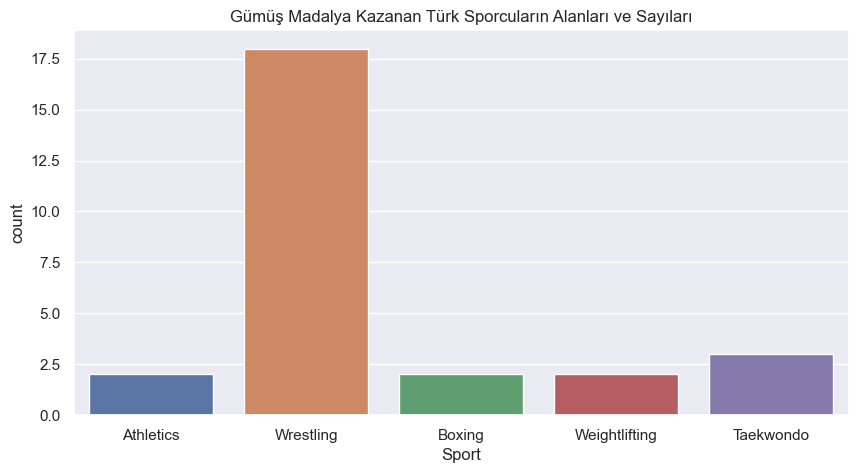

In [511]:
silver_temp = athletes_df[(athletes_df['region']=='Turkey') &(athletes_df['Medal']=="Silver")]
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(x='Sport', data=silver_temp)
plt.title('Gümüş Madalya Kazanan Türk Sporcuların Alanları ve Sayıları')

Yine en çok gümüş madalya kazandığımız spor dalı ata sporumuz güreş olmuş. Atletizm, boks, ağırlık kaldırma ve tekvando gümüş madalya kazandığımız diğer spor dallarıdır.

In [512]:
silver_temp.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
747,428,Elvan Abeylegesse,F,25.0,159.0,40.0,Turkey,TUR,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 5,000 metres",Silver,Turkey,NaN
2871,1595,Hseyin Akba,M,NaN,167.0,57.0,Turkey,TUR,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",Silver,Turkey,NaN
2880,1601,Vehbi Akda,M,23.0,168.0,62.0,Turkey,TUR,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,Turkey,NaN
11432,6244,Ahmet Ayk,M,26.0,178.0,97.0,Turkey,TUR,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Light-Heavyweight, Freestyle",Silver,Turkey,NaN
13110,7127,Halit Balamir,M,NaN,NaN,NaN,Turkey,TUR,1948 Summer,1948,Summer,London,Wrestling,"Wrestling Men's Flyweight, Freestyle",Silver,Turkey,NaN


Genel bakış yaptığımızda yine 1948 yılında en az bir madalya daha kazandığımızı görebiliriz. Biraz araştırma yaptığımda o yıl Türk serbest güreş millî takımının 4 altın, 2 gümüş madalyayla Olimpiyat şampiyonu olduğunu öğrendim.

Text(0.5, 1.0, 'Bronz Madalya Kazanan Türk Sporcuların Alanları ve Sayıları')

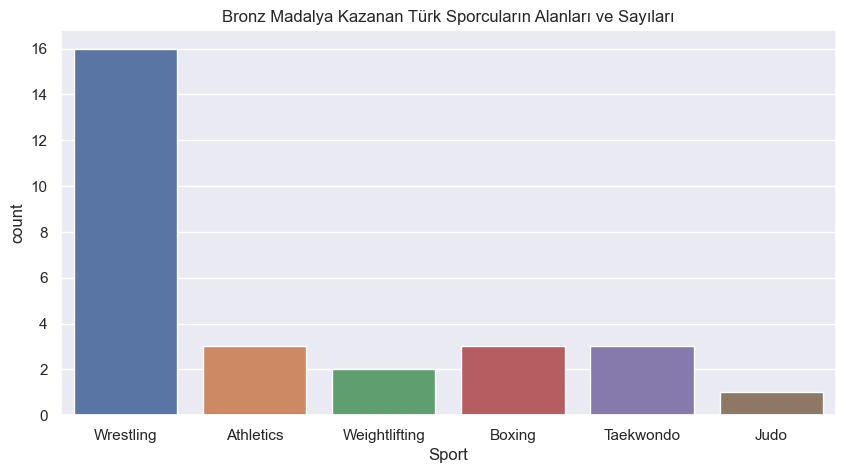

In [513]:
bronze_temp = athletes_df[(athletes_df['region']=='Turkey') &(athletes_df['Medal']=="Bronze")]
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(x='Sport', data=bronze_temp)
plt.title('Bronz Madalya Kazanan Türk Sporcuların Alanları ve Sayıları')

Güreş alanındaki başarılarımızın devam ettiğini görebiliriz. Atletizm, ağırlık kaldırma, boks, tekvando ve judoda da hala iddialıyız.

In [514]:
bronze_temp.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
2869,1595,Hseyin Akba,M,NaN,167.0,57.0,Turkey,TUR,1956 Summer,1956,Summer,Melbourne,Wrestling,"Wrestling Men's Flyweight, Freestyle",Bronze,Turkey,NaN
8491,4674,Eref Apak,M,22.0,184.0,120.0,Turkey,TUR,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's Hammer Throw,Bronze,Turkey,NaN
8668,4763,Reyhan Arabacolu,M,21.0,170.0,77.0,Turkey,TUR,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Men's Middleweight,Bronze,Turkey,NaN
9845,5391,Sedat Artu,M,28.0,162.0,56.0,Turkey,TUR,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Men's Bantamweight,Bronze,Turkey,NaN
10510,5743,Adil Atan,M,23.0,190.0,NaN,Turkey,TUR,1952 Summer,1952,Summer,Helsinki,Wrestling,"Wrestling Men's Light-Heavyweight, Freestyle",Bronze,Turkey,NaN


Dünya genelinde güreş alanında ne kadar başarılıyız bunu merak ettim. Bu alanda altın madalya kazanan takımların içinde 29 altın madalyayla 4. sırada yer alıyoruz.

In [515]:
teams = athletes[(athletes.Sport == 'Wrestling') & (athletes.Medal == 'Gold')].Team
teams.value_counts().head()

Soviet Union     62
United States    52
Japan            32
Turkey           29
Russia           29
Name: Team, dtype: int64